<h1><center> Customer Segmentation </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

There are many models for __clustering__ out there. One of the simplest models amongst them is __K-means__. Despite its simplicity, it is vastly used for clustering in many data science applications. It is especially useful if one needs to quickly discover insights from __unlabeled data__. 

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are tryting to accomplish
- Pattern recognition
- Machine learning
- Data compression
  
In this project, a customer dataset is used to apply customer segmentation. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Describe</li>
                <li>Visualization</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Pre-processing</li>
                <li>K-means</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

In [1]:
 # Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 1. Download Data

In [3]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv'

In [4]:
#download the data
customer_data = pd.read_csv(file_name)

In [5]:
# size of data 
NR = np.size(customer_data,0)
NC = np.size(customer_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  850  samples of data and  10  properties


In [6]:
#display the first 10 rows of data
customer_data.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


There are 10 columns in this dataset. We see there are NaN values. We need to clean the data set first. 

## 2. Data Wrangling

In [7]:
#Evaluating the missing data
missing_data = customer_data.isnull()
missing_data.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False


"True" measn the data is missing. From the first 10 rows, there are missing data. 

In [8]:
#Here use info() to count non-null values or missing values in each column
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


"Defaulted" has 150 null values. We need to remove those rows. 

In [9]:
customer_data = customer_data.dropna(subset=['Defaulted'],axis=0)

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          700 non-null    object 
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 60.2+ KB


Data types look all correct. 

The k-means algorithm isn't directly applicable to categorical variables, so __Adress__ column should be removed. 

In [11]:
customer_data.drop('Address',axis=1,inplace=True)
customer_data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## 3. Exploratory Data Analysis

Data Exploratory or data analysis is requried to find the features or characteristics of the data. 

In [12]:
customer_data.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


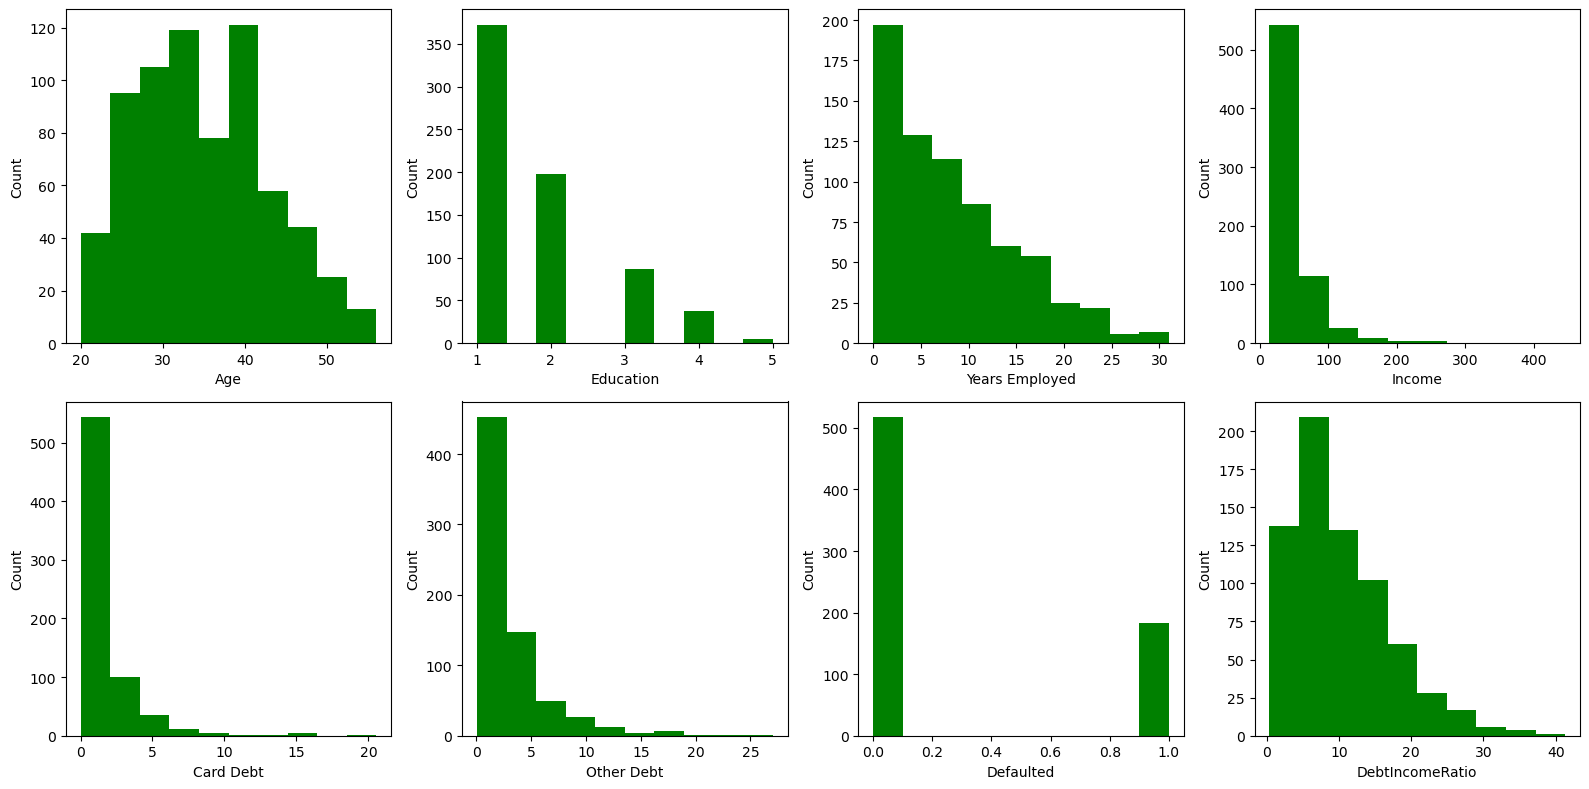

In [13]:
#plot using histogram
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.hist(customer_data['Age'], histtype='bar', facecolor='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,2)
plt.hist(customer_data['Edu'], histtype='bar', facecolor='g')
plt.xlabel('Education')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,3)
plt.hist(customer_data['Years Employed'], histtype='bar', facecolor='g')
plt.xlabel('Years Employed')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,4)
plt.hist(customer_data['Income'], histtype='bar', facecolor='g')
plt.xlabel('Income')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,5)
plt.hist(customer_data['Card Debt'], histtype='bar', facecolor='g')
plt.xlabel('Card Debt')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,6)
plt.hist(customer_data['Other Debt'], histtype='bar', facecolor='g')
plt.xlabel('Other Debt')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,7)
plt.hist(customer_data['Defaulted'], histtype='bar', facecolor='g')
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()

plt.subplot(2,4,8)
plt.hist(customer_data['DebtIncomeRatio'], histtype='bar', facecolor='g')
plt.xlabel('DebtIncomeRatio')
plt.ylabel('Count')
plt.ylim(0,)
plt.tight_layout()


### 4. Model Development

In this section, a k-means model is developed to cluster customers. It would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

#### 4.0 Data Preprocessing

Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [14]:
# standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
X = customer_data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

#### 4.1 K-means

In [15]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 1 1 0 2 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 2 0 0 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 2 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 0 2 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 1 0 1
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0
 2 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 

In [16]:
#save labels to data set
customer_data['Cluster'] = labels

In [17]:
customer_data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


We can easily check the centroid values by averaging the features in each cluster.

In [18]:
customer_data.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387
2,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286


Now, let's look at the distribution of customers based on their age and income:

Text(0, 0.5, 'Income')

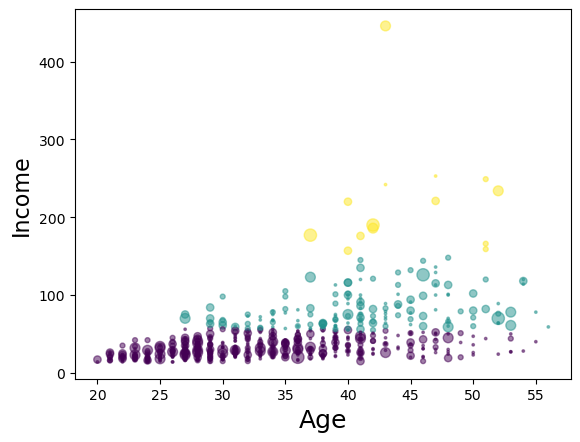

In [19]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

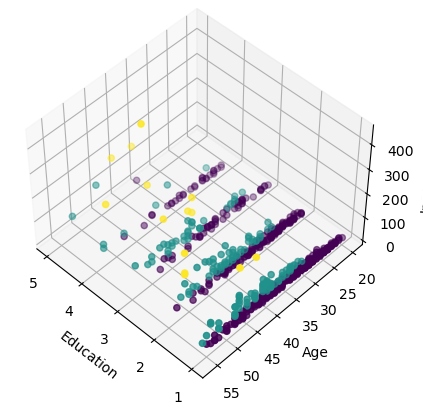

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float64))
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.azim = 134
ax.elev = 48

K-means will partition customers into mutually exclusive groups, for example, into 3 clusters. From above analysis, K-means did pretty good job. It segmentates the customers into three groups. 